In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
def plot_decision_boundary(clf, xlim, ylim, grid_resolution):
    x_coords = np.linspace(start=xlim[0], stop=xlim[1], num=grid_resolution)
    y_coords = np.linspace(start=ylim[0], stop=ylim[1], num=grid_resolution)
    a=np.tile(x_coords,grid_resolution)
    b=np.repeat(y_coords, grid_resolution)
    c=np.stack((a,b),axis=1)
    colors={-1:'pink',1:'lightskyblue'}
    y=clf.predict(c)
    d = []
    for i in y:
        d.append(colors[i])
    plt.scatter(a,b,c=np.asarray(d))
    
    
    


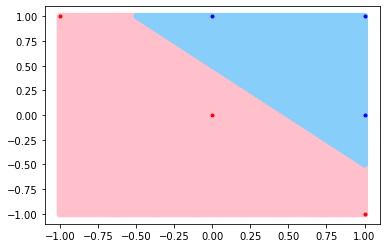

In [3]:
data_string = """
x0, x1,  y
 0,  0, -1
-1,  1, -1
 1, -1, -1
 0,  1,  1
 1,  1,  1
 1,  0,  1
"""
df = pd.read_csv(StringIO(data_string), sep='\s*,\s+', engine='python')
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(df[['x0', 'x1']], df['y'])
plot_decision_boundary(clf=clf, xlim=(-1, 1), ylim=(-1, 1), grid_resolution=100)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])


|--- feature_1 <= -0.50
|   |--- class: -1
|--- feature_1 >  -0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_0 <= -0.50
|   |   |   |--- class: -1
|   |   |--- feature_0 >  -0.50
|   |   |   |--- feature_1 <= 0.50
|   |   |   |   |--- class: -1
|   |   |   |--- feature_1 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 1



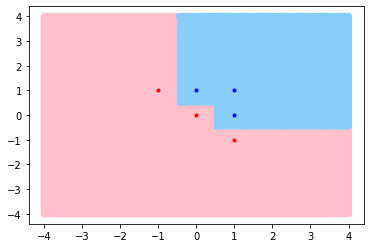

In [4]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(df[['x0', 'x1']], df['y'])
plot_decision_boundary(clf=clf, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])
    
print(export_text(clf))


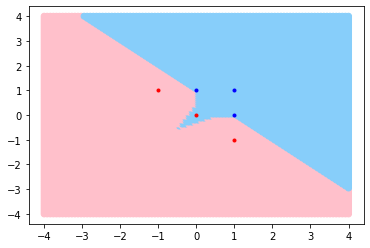

In [5]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(df[['x0', 'x1']], df['y'])
plot_decision_boundary(clf=knn, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

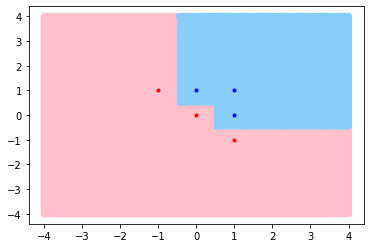

In [6]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(df[['x0', 'x1']], df['y'])
plot_decision_boundary(clf=knn, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

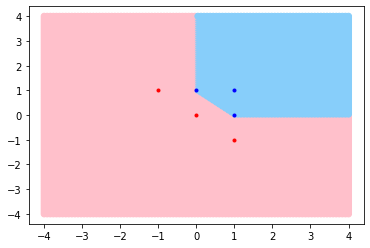

In [7]:
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(df[['x0', 'x1']], df['y'])
plot_decision_boundary(clf=knn, xlim=(-4, 4), ylim=(-4, 4), grid_resolution=100)
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df.x0[df.y == y], df.x1[df.y == y], '.', color=colors[y])

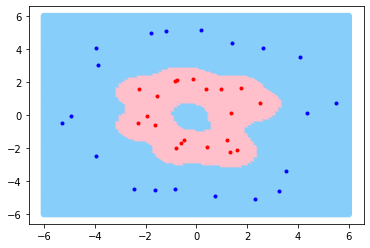

In [8]:
df1=pd.read_csv("circles.csv")#try other gamma before set gamma=1/2
df1.loc[df1['y']==0,'y']=-1
clf = svm.SVC(kernel="rbf", C=1,gamma=2)
clf.fit(df1[['x0', 'x1']], df1['y'])
plot_decision_boundary(clf=clf, xlim=(-6, 6), ylim=(-6, 6), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df1.x0[df1.y == y], df1.x1[df1.y == y], '.', color=colors[y])

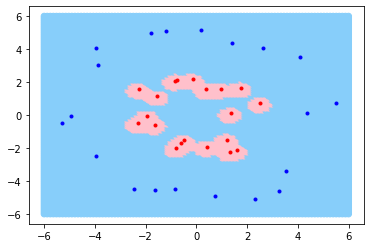

In [9]:
df1=pd.read_csv("circles.csv")
df1.loc[df1['y']==0,'y']=-1
clf = svm.SVC(kernel="rbf", C=1,gamma=10)
clf.fit(df1[['x0', 'x1']], df1['y'])
plot_decision_boundary(clf=clf, xlim=(-6, 6), ylim=(-6, 6), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df1.x0[df1.y == y], df1.x1[df1.y == y], '.', color=colors[y])

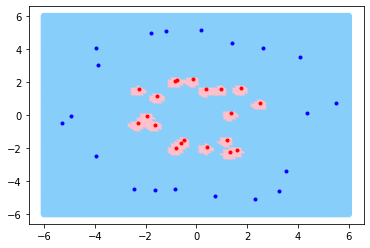

In [10]:
df1=pd.read_csv("circles.csv")
df1.loc[df1['y']==0,'y']=-1
clf = svm.SVC(kernel="rbf", C=1,gamma=30)
clf.fit(df1[['x0', 'x1']], df1['y'])
plot_decision_boundary(clf=clf, xlim=(-6, 6), ylim=(-6, 6), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df1.x0[df1.y == y], df1.x1[df1.y == y], '.', color=colors[y])

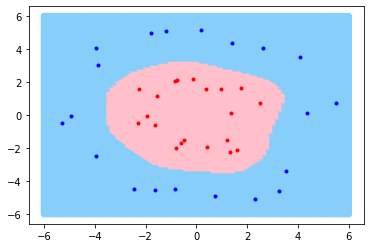

In [11]:
df1=pd.read_csv("circles.csv")
df1.loc[df1['y']==0,'y']=-1
clf = svm.SVC(kernel="rbf", C=1,gamma=1/2)
clf.fit(df1[['x0', 'x1']], df1['y'])
plot_decision_boundary(clf=clf, xlim=(-6, 6), ylim=(-6, 6), grid_resolution=100)
# Add training examples to plot.
colors = {-1:'red', 1:'blue'}
for y in (-1, 1):
    plt.plot(df1.x0[df1.y == y], df1.x1[df1.y == y], '.', color=colors[y])


x1=(-0.2,-0.4);
x2=(-0.36,-0.72);
x3=(-0.488,-0.976);


In [12]:
df0=pd.read_csv("ellipses.csv")
df0.head()

,x0,x1,y
0,-1.937,-0.006,0
1,-1.622,-0.057,0
2,-0.791,-0.200,0
3,-0.614,-0.171,0
4,-0.490,-0.154,0


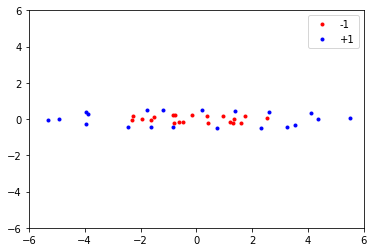

In [13]:
X = df0.iloc[:, 0:2].to_numpy()
y = df0.iloc[:, 2].to_numpy()
plt.plot(X[y == 0, 0], X[y == 0, 1], '.r', label='-1')
plt.plot(X[y ==  1, 0], X[y ==  1, 1], '.b', label='+1')
low = -6
high=6
plt.xlim(low, high)
plt.ylim(low, high)
plt.legend()

In [14]:


knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X, y)

print(f'Training accuracy is {knn.score(X,y):.3}')


Training accuracy is 0.725


Training accuracy is 1.0


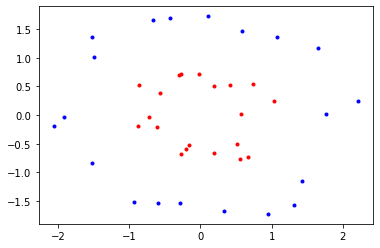

In [15]:

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X, y)

print(f'Training accuracy is {knn.score(X, y):.3}')

plt.plot(X[y == 0, 0], X[y == 0, 1], '.r', label='-1')
plt.plot(X[y ==  1, 0], X[y ==  1, 1], '.b', label='+1')

In [16]:


clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
clf.fit(X, y)

print(f'Training accuracy is {clf.score(X,y):.3}')

Training accuracy is 1.0


Because ID3 decision tree is not sensitive to the variance of the data